# Sistem Rekomendasi Skincare dengan Hybrid Filtering TF-IDF dan CNN

In [1]:
# loads libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split

### Kolom Description

In [ ]:
data = pd.read_csv('data_skincare_for_modeling_1_1.csv')
data

In [ ]:
data.describe()
data.info()

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
# Define text preprocessing methods
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F000-\U0001F6FF"  # emoticons & transportasi
        u"\U0001F780-\U0001F7FF"  # simbol, tanda & bendera
        u"\U0001F800-\U0001F8FF"  # emoji surat / katakana
        u"\U0001F900-\U0001F9FF"  # emoji berbagai jenis
        u"\U00002600-\U000026FF"  # simbol matahari & bulan
        u"\U00002700-\U000027BF"  # simbol koin, alat musik, dll.
        u"\U0001F300-\U0001F5FF"  # simbol & markah
        u"\U0001F680-\U0001F6FF"  # transportasi & simbol tempat
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def preprocess_text(text):
   # Remove emoji
    text = remove_emoji(text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Case folding
    text = text.lower()
    # Tokenization
    words = nltk.word_tokenize(text)
    # Filtering
    filtered_words = [word for word in words if re.match(r'[a-zA-Z]+', word) and not word in stop_words]
    # Stemming
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    # Joining the stemmed words back into a single string
    preprocessed_text = " ".join(stemmed_words)
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Apply the text preprocessing function to the "review" column
data["description_processed"] = data["description"].apply(preprocess_text)

In [ ]:
data

In [ ]:
# simpan data ke csv
data.to_csv('data_skincare_for_modeling_2_1.csv', index=False)

## Split Data Set

In [3]:
data = pd.read_csv('data_skincare_for_modeling_2_1.csv')
data

,subcategory,brand,product_name,price,description,image_url,product_name_concat,user_name,star_rating,is_recommend_imputed,product_id,user_id,description_processed
0,Mask Sheet,A Bonne,Berry-Me-Baby Sheetmask,Rp. 10.000,sheetmask seri a bloom varian blueberry untuk ...,https://image.femaledaily.com/dyn/210/images/p...,Berry-Me-Baby Sheetmask_Mask Sheet,Ruthdayu,5.0,Yes,0,0,sheetmask seri a bloom varian blueberry anti a...
1,Mask Sheet,A Bonne,Berry-Me-Baby Sheetmask,Rp. 10.000,sheetmask seri a bloom varian blueberry untuk ...,https://image.femaledaily.com/dyn/210/images/p...,Berry-Me-Baby Sheetmask_Mask Sheet,expectopatronum,5.0,Yes,0,1,sheetmask seri a bloom varian blueberry anti a...
2,Mask Sheet,A Bonne,Berry-Me-Baby Sheetmask,Rp. 10.000,sheetmask seri a bloom varian blueberry untuk ...,https://image.femaledaily.com/dyn/210/images/p...,Berry-Me-Baby Sheetmask_Mask Sheet,hilyaanafisa_,5.0,Yes,0,2,sheetmask seri a bloom varian blueberry anti a...
3,Wash-Off,A by BOM,Huppies,Rp. 10.000,"menyembuhkan kulit kusam, efek anti-aging, men...",https://image.femaledaily.com/dyn/210/images/p...,Huppies_Milk Face Mask_Wash-Off,Syifareihany,5.0,Yes,1,3,sembuh kulit kusam efek anti-aging jaga kelemb...
4,Wash-Off,A by BOM,Huppies,Rp. 10.000,"menyembuhkan kulit kusam, efek anti-aging, men...",https://image.femaledaily.com/dyn/210/images/p...,Huppies_Milk Face Mask_Wash-Off,scalava,2.0,No,1,4,sembuh kulit kusam efek anti-aging jaga kelemb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52030,Lotion & Emulsion,Beauty K,Jeju Fresh Aloe,Rp. 75.000,Jeju Fresh Aloe Soothing Gel\r\n\r\nMengandung...,https://image.femaledaily.com/dyn/210/images/p...,Jeju Fresh Aloe_Lotion & Emulsion,tari1107,5.0,Unknown,256,13475,jeju fresh aloe soothing gel kandung ekstrak l...
52031,Lotion & Emulsion,Beauty K,Jeju Fresh Aloe,Rp. 75.000,Jeju Fresh Aloe Soothing Gel\r\n\r\nMengandung...,https://image.femaledaily.com/dyn/210/images/p...,Jeju Fresh Aloe_Lotion & Emulsion,ayulrst,4.0,Unknown,256,13476,jeju fresh aloe soothing gel kandung ekstrak l...
52032,Lotion & Emulsion,Beauty K,Jeju Fresh Aloe,Rp. 75.000,Jeju Fresh Aloe Soothing Gel\r\n\r\nMengandung...,https://image.femaledaily.com/dyn/210/images/p...,Jeju Fresh Aloe_Lotion & Emulsion,nino0692,5.0,Unknown,256,13477,jeju fresh aloe soothing gel kandung ekstrak l...
52033,Lotion & Emulsion,Beauty K,Jeju Fresh Aloe,Rp. 75.000,Jeju Fresh Aloe Soothing Gel\r\n\r\nMengandung...,https://image.femaledaily.com/dyn/210/images/p...,Jeju Fresh Aloe_Lotion & Emulsion,Dvnpricilia,2.0,Unknown,256,13478,jeju fresh aloe soothing gel kandung ekstrak l...


In [4]:
# Memisahkan data train (80%) dan sisa (20%)
df_train, df_val = train_test_split(data, train_size=0.8, random_state=77)

# Output jumlah baris pada masing-masing dataset
print("Jumlah baris pada train dataset:", len(df_train))
print("Jumlah baris pada validation dataset:", len(df_val))

Jumlah baris pada train dataset: 41628
Jumlah baris pada validation dataset: 10407


## Implementasi Content Based Filtering

### Representasi Fitur TF- IDF

In [5]:
# Menghitung jumlah kata unik pada kolom "description_processed" (df_train)
description_words = set()
for text in df_train["description_processed"]:
    for word in text.split():
        description_words.add(word)

print("Jumlah kata unik:", len(description_words))

Jumlah kata unik: 2999


In [6]:
# Menghitung jumlah kata unik pada kolom "description_processed" (data)
description_words = set()
for text in data["description_processed"]:
    for word in text.split():
        description_words.add(word)

print("Jumlah kata unik:", len(description_words))

Jumlah kata unik: 3042


### **Jenis TFIDF 1**

(gak pake data train)

In [7]:
# tampilkan data train berdasarkan description_processed agar tidak duplikat
data_desc = data.drop_duplicates(subset=['description_processed'])
data_desc

,subcategory,brand,product_name,price,description,image_url,product_name_concat,user_name,star_rating,is_recommend_imputed,product_id,user_id,description_processed
0,Mask Sheet,A Bonne,Berry-Me-Baby Sheetmask,Rp. 10.000,sheetmask seri a bloom varian blueberry untuk ...,https://image.femaledaily.com/dyn/210/images/p...,Berry-Me-Baby Sheetmask_Mask Sheet,Ruthdayu,5.0,Yes,0,0,sheetmask seri a bloom varian blueberry anti a...
3,Wash-Off,A by BOM,Huppies,Rp. 10.000,"menyembuhkan kulit kusam, efek anti-aging, men...",https://image.femaledaily.com/dyn/210/images/p...,Huppies_Milk Face Mask_Wash-Off,Syifareihany,5.0,Yes,1,3,sembuh kulit kusam efek anti-aging jaga kelemb...
11,Wash-Off,A by BOM,Huppies Beet Root Face Mask,Rp. 6.000,masker organik yang memiliki claim :\r\n1. mem...,https://image.femaledaily.com/dyn/210/images/p...,Huppies Beet Root Face Mask_Wash-Off,agrlpa,4.0,Yes,2,11,masker organik milik claim bantu kurang jerawa...
15,Serum & Essence,A'kin,Certified Organic Rosehip Oil,Rp. 532.134,A'kin Certified Organic Rosehip Oil merupakan ...,https://image.femaledaily.com/dyn/210/images/p...,Certified Organic Rosehip Oil_Serum & Essence,MightyZaz,3.0,No,3,15,a kin certified organic rosehip oil serum buat...
20,Serum & Essence,A'kin,Rosehip Oil With Vitamin C,Rp. 398.934,A'kin Rosehip Oil With Vitamin C merupakan ser...,https://image.femaledaily.com/dyn/210/images/p...,Rosehip Oil With Vitamin C_Serum & Essence,Gaya,5.0,Yes,4,20,a kin rosehip oil with vitamin c serum kandung...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51846,Facial Wash,Beauty In The Pot,Face Wash,Rp. 75.000,Beauty in The Pot Face Wash Tea Time diracik d...,https://image.femaledaily.com/dyn/210/images/p...,Face Wash_Tea Time_Facial Wash,sweetzhaa,3.0,Yes,252,7000,beauty in the pot face wash tea time racik och...
51857,Facial Wash,Beauty In The Pot,Face Wash,Rp. 75.000,Beauty in The Pot Face Wash Mom Milk baik untu...,https://image.femaledaily.com/dyn/210/images/p...,Face Wash_Mom Milk_Facial Wash,sweetzhaa,3.0,Yes,253,7000,beauty in the pot face wash mom milk normal se...
51868,Wash-Off,Beauty In The Pot,Face Mask,Rp. 100.000,MORNING TEA MASK BEAUTY IN THE POT direkomenda...,https://image.femaledaily.com/dyn/210/images/p...,Face Mask_Morning Tea_Wash-Off,amadeac,4.0,Yes,254,9873,morning tea mask beauty in the pot rekomendasi...
51878,Facial Wash,Beauty In The Pot,Facial Wash Brightening,Rp. 59.000,NAMA : BEAUTY IN THE POT - Facial Wash with Li...,https://image.femaledaily.com/dyn/210/images/p...,Facial Wash Brightening_Facial Wash,Noni97,1.0,No,255,12120,nama beauty in the pot facial wash with licori...


In [8]:
# cek nilai null
data_desc.isnull().sum()

subcategory              0
brand                    0
product_name             0
price                    0
description              0
image_url                0
product_name_concat      0
user_name                0
star_rating              0
is_recommend_imputed     0
product_id               0
user_id                  0
description_processed    0
dtype: int64

In [9]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data_desc['description_processed'])

tfidf_matrix.shape

(255, 2953)

In [10]:
print(tfidf_matrix)

  (0, 526)	0.1711997989688282
  (0, 73)	0.28296478386367124
  (0, 147)	0.2180852459755045
  (0, 378)	0.40852217020852205
  (0, 2829)	0.43893427052672757
  (0, 374)	0.40852217020852205
  (0, 2425)	0.3869444416390421
  (0, 2442)	0.40852217020852205
  (1, 1425)	0.35141269870513986
  (1, 2141)	0.3027264990744299
  (1, 2726)	0.2788978761302599
  (1, 1379)	0.2939995180032181
  (1, 1327)	0.23868340402182217
  (1, 813)	0.27551660211842455
  (1, 1453)	0.35141269870513986
  (1, 1446)	0.23153935278734877
  (1, 2407)	0.3937242375341034
  (1, 73)	0.31248243388801167
  (1, 147)	0.24083494605577516
  (2, 1179)	0.2704999497778481
  (2, 1818)	0.25564788438798014
  (2, 1172)	0.2891002656518183
  (2, 1398)	0.23269265783858473
  (2, 1663)	0.23779896713999552
  (2, 458)	0.2891002656518183
  :	:
  (254, 2280)	0.16877164497318756
  (254, 524)	0.301269231462015
  (254, 1432)	0.15855739980270817
  (254, 104)	0.1167088723590594
  (254, 2311)	0.12106190751918766
  (254, 297)	0.12784538558845596
  (254, 2680)	0.1

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14094407, 0.        , ..., 0.        , 0.01008519,
        0.        ],
       [0.14094407, 1.        , 0.0239517 , ..., 0.02448223, 0.10419633,
        0.07849964],
       [0.        , 0.0239517 , 1.        , ..., 0.09379375, 0.11451111,
        0.08180679],
       ...,
       [0.        , 0.02448223, 0.09379375, ..., 1.        , 0.1682897 ,
        0.06795259],
       [0.01008519, 0.10419633, 0.11451111, ..., 0.1682897 , 1.        ,
        0.08909168],
       [0.        , 0.07849964, 0.08180679, ..., 0.06795259, 0.08909168,
        1.        ]])

In [12]:
user_skincare = "sunscreen azarine"
user_skin_type = "kering"  
user_unsuitable_ingredients = "alcohol"  

# Gabungkan input pengguna menjadi satu teks
user_input_text = f"{user_skincare} {user_skin_type} {user_unsuitable_ingredients}"

In [13]:
# Tambahkan informasi pengguna ke dataframe
user_data = {'description_processed': [user_input_text]}
user_df = pd.DataFrame(user_data)
data_desc = pd.concat([data_desc, user_df], ignore_index=True)

In [14]:
tfidf_matrix = tfidf.fit_transform(data_desc['description_processed'])
cosine_sim = cosine_similarity(tfidf_matrix)

In [15]:
def get_top_n_recommendations_with_similarity(user_input, cosine_sim_matrix, n=5):
    # Dapatkan nilai similarity dari input pengguna dengan semua produk
    sim_scores = cosine_similarity(tfidf.transform([user_input]), tfidf_matrix).flatten()

    # Urutkan produk berdasarkan similarity
    sim_scores = sorted(enumerate(sim_scores), key=lambda x: x[1], reverse=True)

    # Hilangkan produk dengan indeks yang sama dengan input pengguna
    sim_scores = [x for x in sim_scores if x[0] != len(data_desc) - 1]

    # Ambil pasangan indeks produk dan nilai kemiripannya untuk n teratas
    top_n_indexes_and_scores = sim_scores[:n]

    # Dapatkan judul produk dan nilai kemiripan yang direkomendasikan
    top_n_recommendations = [(data_desc['product_name'].iloc[idx], score) for idx, score in top_n_indexes_and_scores]

    return top_n_recommendations

In [16]:
user_recommendations_with_similarity = get_top_n_recommendations_with_similarity(user_input_text, cosine_sim, n=5)

print("Rekomendasi berdasarkan input pengguna:")
for title, similarity_score in user_recommendations_with_similarity:
    print(f"{title} - Similarity: {similarity_score:.4f}")

Rekomendasi berdasarkan input pengguna:
Heartleaf Sun Essence Calming Drop - Similarity: 0.2924
Extra UV Facial Gel - Similarity: 0.1549
The Great Shield Sunscreen - Similarity: 0.1054
Ultra sensitive hypoallergienic Sunblock SPF 65 - Similarity: 0.1028
Oil Control Day Lotion - Similarity: 0.1023


### **Jenis TFIDF 2**

(pake data train dan seluruh data, nerapin svd)

In [12]:
tfidf = TfidfVectorizer()
tfidf_matrix_train = tfidf.fit_transform(df_train['description_processed'])

tfidf_matrix_train.shape

(41628, 2917)

In [38]:
print(tfidf_matrix_train)

  (0, 358)	0.06948770382621938
  (0, 2468)	0.05826125734389253
  (0, 803)	0.05558986448806718
  (0, 766)	0.07661737492604859
  (0, 551)	0.06762916330877344
  (0, 936)	0.14847300290277432
  (0, 924)	0.11798020289061335
  (0, 1440)	0.14988949344448285
  (0, 2004)	0.06603022605436999
  (0, 514)	0.07613817715696837
  (0, 1210)	0.07520199782771983
  (0, 1099)	0.06141665054518256
  (0, 351)	0.07645555459811604
  (0, 1055)	0.05100716320011448
  (0, 442)	0.05363501504095416
  (0, 1048)	0.05299218191895503
  (0, 896)	0.052604577267897024
  (0, 1201)	0.1499018029186245
  (0, 2839)	0.07308242509482035
  (0, 1261)	0.044208703819835674
  (0, 1323)	0.0598253640864466
  (0, 963)	0.04833692813634068
  (0, 2569)	0.0489562313016877
  (0, 1988)	0.06283595807503788
  (0, 2021)	0.06283759406312373
  :	:
  (41627, 2892)	0.048736741701460355
  (41627, 163)	0.04580488452712968
  (41627, 1474)	0.03314283750728517
  (41627, 102)	0.04085571219879446
  (41627, 214)	0.047708706915444106
  (41627, 516)	0.0476551295

In [45]:
# # Membuat objek SVD
# svd = TruncatedSVD(n_components=500)

# # Melakukan fit dan transformasi pada data
# tfidf_matrix_svd = svd.fit_transform(tfidf_matrix_train)

In [22]:
pd.DataFrame(
    tfidf_matrix_train.todense(), 
    columns=tfidf.get_feature_names_out(),
    index=df_train.product_name
).sample(20, axis=1).sample(10, axis=0)

,pigmentasi,conditioned,previous,hypoallergenic,intensively,limonene,claritea,aktivitas,calmed,saat,wheat,cleansers,nosebum,all,niacinamde,masukin,mushroom,witch,thin,telapak
product_name,,,,,,,,,,,,,,,,,,,,
Your Skin Bae Serum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Skin Bae Serum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Skin Bae Serum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Skin Bae Serum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Skin Bae Serum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Skin Bae Serum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Skin Bae Serum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hydrating Treatment Essence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Miraculous Retinol Ampoule,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Jenis TFIDF 3**

(pake data train dan tidak pake seluruh data karena deskripsi duplikat, tidak menerapkan svd)

In [58]:
# tampilkan data train berdasarkan description_processed agar tidak duplikat
df_train_desc = df_train.drop_duplicates(subset=['description_processed'])
df_train_desc

,subcategory,brand,product_name,price,description,image_url,product_name_concat,user_name,star_rating,is_recommend_imputed,product_id,user_id,description_processed
17773,Serum & Essence,AVOSKIN,Your Skin Bae Serum,Rp. 139.000,Reformulation in August 2022\r\n\r\nAvoskin Yo...,https://image.femaledaily.com/dyn/210/images/p...,Your Skin Bae Serum_Marine Collagen 10% + Ging...,giaanggiaf,5.0,Yes,109,7231,reformulation in august avoskin your skin bae ...
10521,Serum & Essence,AVOSKIN,Your Skin Bae Serum,Rp. 139.000,Avoskin Your Skin Bae Ultimate Alpha Arbutin 3...,https://image.femaledaily.com/dyn/210/images/p...,Your Skin Bae Serum_Alpha Arbutin 3% + Grapese...,retnaniplaneto,3.0,Yes,107,7697,avoskin your skin bae ultimate alpha arbutin g...
17508,Serum & Essence,AVOSKIN,Your Skin Bae Serum,Rp. 157.900,Avoskin Your Skin Bae Serum Niacinamide 12% + ...,https://image.femaledaily.com/dyn/210/images/p...,Your Skin Bae Serum_Niacinamide 12% + Centella...,dyasikas,5.0,Yes,108,9073,avoskin your skin bae serum niacinamide centel...
31728,Serum & Essence,AVOSKIN,Your Skin Bae Serum,Rp. 129.000,Avoskin Your Skin Bae Lactic Acid 10% + Kiwi F...,https://image.femaledaily.com/dyn/210/images/p...,Your Skin Bae Serum_Lactic Acid 10% + Kiwi Fru...,azurazka,4.0,Yes,112,1639,avoskin your skin bae lactic acid kiwi fruit n...
35801,Serum & Essence,AVOSKIN,Your Skin Bae Serum,Rp. 139.000,Avoskin Your Skin Bae Panthenol 5% + Mugwort +...,https://image.femaledaily.com/dyn/210/images/p...,Your Skin Bae Serum_Panthenol 5% + Mugwort + C...,annisaputris,5.0,Yes,113,6334,avoskin your skin bae panthenol mugwort cica s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,Serum & Essence,AFK,Radiance Glowing Serum,Rp. 140.000,AFK Radiance Glowing Serum merupakan serum unt...,https://image.femaledaily.com/dyn/210/images/p...,Radiance Glowing Serum_Serum & Essence,faizah_eferdy,5.0,Yes,30,563,afk radiance glowing serum serum nutrisi kulit...
1043,Cream,ANTIPODES,Anti-Ageing Minis,Rp. 330.000,Antipodes Anti-Ageing Minis merupakan dua prod...,https://image.femaledaily.com/dyn/210/images/p...,Anti-Ageing Minis_Cream,astariasti,5.0,Unknown,77,722,antipodes anti-ageing min produk anti-ageing b...
902,Serum & Essence,AM2PM,Ageverlasting Serum,Rp. 50.000,AGEVERLASTING SERUM\r\nSerum ANTIAGING yang da...,https://image.femaledaily.com/dyn/210/images/p...,Ageverlasting Serum_Serum & Essence,maureentirta,5.0,Yes,60,712,ageverlasting serum serum antiaging wajah muda...
50080,Face Oil,Banila Co,Miss Flower and Mr Honey Essence Oil,Rp. 340.000,DESCRIPTION\r\n\r\nHydrating & nourishing easy...,https://image.femaledaily.com/dyn/210/images/p...,Miss Flower and Mr Honey Essence Oil_Face Oil,angelflonis,5.0,Unknown,187,12837,description hydrating nourishing easy-grip on-...


In [59]:
tfidf = TfidfVectorizer()
tfidf_matrix_train = tfidf.fit_transform(df_train_desc['description_processed'])

tfidf_matrix_train.shape

(245, 2917)

In [60]:
print(tfidf_matrix_train)

  (0, 358)	0.12876257794206633
  (0, 2468)	0.06831969865146899
  (0, 803)	0.08732840802941527
  (0, 766)	0.13627397307930106
  (0, 551)	0.11349479911783614
  (0, 936)	0.12561351694154094
  (0, 924)	0.11349479911783614
  (0, 1440)	0.1615983807220967
  (0, 2004)	0.09084875872049941
  (0, 514)	0.1155568881229755
  (0, 1210)	0.11349479911783614
  (0, 1099)	0.08571242336147811
  (0, 351)	0.11777185948563676
  (0, 1055)	0.07108059269320215
  (0, 442)	0.07576836882186651
  (0, 1048)	0.07359370553777328
  (0, 896)	0.058961874869497326
  (0, 1201)	0.12276484475821944
  (0, 2839)	0.06460463433539342
  (0, 1261)	0.04274517711623884
  (0, 1323)	0.06619906225105954
  (0, 963)	0.04237388742568011
  (0, 2569)	0.049649009113296824
  (0, 1988)	0.1020477598018939
  (0, 2021)	0.09705477452931122
  :	:
  (244, 2200)	0.11070607574108707
  (244, 2779)	0.14687455945068167
  (244, 1347)	0.1729490736360939
  (244, 2734)	0.1413754732076812
  (244, 335)	0.32669994231595917
  (244, 75)	0.31593150353632715
  (244,

In [63]:
pd.DataFrame(
    tfidf_matrix_train.todense(), 
    columns=tfidf.get_feature_names_out(),
    index=df_train_desc.product_name
).sample(20, axis=1).sample(20, axis=0)

,asal,avoskin,taraxacum,cocoyl,prefer,algae,silicons,iritasi,physical,created,lupulus,asiatic,go,undaria,angelica,hydroxyl,beras,rileks,limpah,dramatis
product_name,,,,,,,,,,,,,,,,,,,,
Gentle Cleanser,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spring Green Tea Watery Calming Cream,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Avocado Pear Nourishing Night Cream,0.114520,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Optibrow Enhancing Serum,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Your Skin Bae Serum,0.000000,0.19844,0.0,0.000000,0.000000,0.0,0.000000,0.095135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Be Plain Hyaluronic Moisturizer,0.000000,0.00000,0.0,0.000000,0.148197,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mild Acidic Foam Cleanser,0.000000,0.00000,0.0,0.323607,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apple AC Therapy,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Face Wash,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix_train)
cosine_sim

array([[1.        , 0.27803622, 0.37231895, ..., 0.11543564, 0.        ,
        0.06202189],
       [0.27803622, 1.        , 0.3281864 , ..., 0.03197207, 0.        ,
        0.13987013],
       [0.37231895, 0.3281864 , 1.        , ..., 0.12595392, 0.01637282,
        0.07865517],
       ...,
       [0.11543564, 0.03197207, 0.12595392, ..., 1.        , 0.        ,
        0.01294521],
       [0.        , 0.        , 0.01637282, ..., 0.        , 1.        ,
        0.00837516],
       [0.06202189, 0.13987013, 0.07865517, ..., 0.01294521, 0.00837516,
        1.        ]])

### Get Recommendation 2

In [42]:
user_input_skincare = "sunscreen azarine hydra"
user_input_skin_type = "Kulit kering"
user_input_not_suited = "Alcohol"

In [46]:
def get_recommendations(user_input_skincare, user_input_skin_type, user_input_not_suited, n=5):
    # Preprocessing Input Pengguna
    processed_user_input = preprocess_text(user_input_skincare + " " + user_input_skin_type + " " + user_input_not_suited)
    
    # Representasi Fitur untuk Input Pengguna
    user_tfidf_vector = tfidf.transform([processed_user_input])
    
    # Perhitungan Similaritas
    similarities = cosine_similarity(user_tfidf_vector, tfidf_matrix_train)
    
    # Sorting dan Pemilihan Top N
    similarities = similarities.flatten()
    top_n_indices = similarities.argsort()[-n:][::-1]  # Ambil N produk dengan similaritas tertinggi
    
    # Membuat DataFrame Rekomendasi
    recommended_df = pd.DataFrame({
        'Product Name': train_data['product_name_concat'].iloc[top_n_indices],
        'Similarity Score': similarities[top_n_indices]
    })

    return recommended_df

In [47]:
recommended_products = get_recommendations(user_input_skincare, user_input_skin_type, user_input_not_suited, n=5)

In [48]:
recommended_products

,Product Name,Similarity Score
48405,Heartleaf Sun Essence Calming Drop_Sun Protection,0.450795
48421,Heartleaf Sun Essence Calming Drop_Sun Protection,0.450795
48417,Heartleaf Sun Essence Calming Drop_Sun Protection,0.450795
48415,Heartleaf Sun Essence Calming Drop_Sun Protection,0.450795
48414,Heartleaf Sun Essence Calming Drop_Sun Protection,0.450795


## Implementasi Collaborative Filtering

### Data Preparation

mendapatkan jumlah user, skincares, dan nilai star ratings

In [19]:
# get number of users
num_users = len(data['user_id'].unique())
print(num_users)

# get number of skincare
num_skincare = len(data['product_id'].unique())
print(num_skincare)

# change dtype
data['star_rating'] = data['star_rating'].values.astype(np.float32)

# get min values of rating
min_rating = min(data['star_rating'])

# get max values of rating
max_rating = max(data['star_rating'])

print('Number of User: {}, Number of Skincare: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_skincare, min_rating, max_rating
))

13480
257
Number of User: 13480, Number of Skincare: 257, Min Rating: 1.0, Max Rating: 5.0


### Proses Training

mengembangkan model untuk menghitung skor kecocokan antara users dan films menggunakan teknik embedding

In [22]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_skincare, embedding_size, cnn_filters, cnn_kernel_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_skincare = num_skincare
        self.embedding_size = embedding_size
        self.cnn_filters = cnn_filters
        self.cnn_kernel_size = cnn_kernel_size

        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.skincare_embedding = layers.Embedding(
            num_skincare,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.skincare_bias = layers.Embedding(num_skincare, 1)

        # Add a 1D CNN layer
        self.cnn_layer = layers.Conv1D(filters=cnn_filters, kernel_size=cnn_kernel_size, activation='relu')

        # Dense layer with a single unit and sigmoid activation
        self.dense_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        skincare_vector = self.skincare_embedding(inputs[:, 1])
        skincare_bias = self.skincare_bias(inputs[:, 1])

        # Concatenate user and skincare embeddings
        user_skincare_concat = tf.concat([user_vector, skincare_vector], axis=1)

        # Apply CNN layer
        cnn_output = self.cnn_layer(tf.expand_dims(user_skincare_concat, axis=2))
        cnn_output = tf.keras.layers.Flatten()(cnn_output)

        # Combine CNN output with biases
        combined_output = tf.concat([cnn_output, user_bias, skincare_bias], axis=1)

        # Apply the pre-defined Dense layer
        x = self.dense_layer(combined_output)

        return x

compile model dilakukan menggunakan BinaryCrossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

In [23]:
# Rest of your code remains unchanged
model = RecommenderNet(num_users, num_skincare, 50, cnn_filters=32, cnn_kernel_size=3 )
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [24]:
# Mendefinisikan callback ModelCheckpoint untuk menyimpan hanya bobot
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_checkpoint.h5',  # tentukan jalur untuk menyimpan bobot
    monitor='val_loss',  # memantau kehilangan validasi
    save_best_only=True,  # menyimpan hanya model terbaik
    save_weights_only=True,  # menyimpan hanya bobot, bukan seluruh model
    mode='min',  # mode dapat 'min' atau 'max' tergantung pada kuantitas yang dipantau
    verbose=2
)

melakukan proses training dengan menentukan nilai epochs sebesar 25

In [25]:
history = model.fit(
    x=df_train[['user_id', 'product_id']].values,
    y=df_train['star_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values,
    batch_size=32,
    epochs=25,
    validation_data=(df_val[['user_id', 'product_id']].values, df_val['star_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values),
    callbacks=[checkpoint_callback]
)

Epoch 1/25
1299/1301 [============================>.] - ETA: 0s - loss: 0.3813 - root_mean_squared_error: 0.1946
Epoch 1: val_loss improved from inf to 0.34008, saving model to model_weights_checkpoint.h5
1301/1301 [==============================] - 37s 25ms/step - loss: 0.3812 - root_mean_squared_error: 0.1946 - val_loss: 0.3401 - val_root_mean_squared_error: 0.1620
Epoch 2/25
1301/1301 [==============================] - ETA: 0s - loss: 0.3177 - root_mean_squared_error: 0.1414
Epoch 2: val_loss did not improve from 0.34008
1301/1301 [==============================] - 36s 27ms/step - loss: 0.3177 - root_mean_squared_error: 0.1414 - val_loss: 0.3408 - val_root_mean_squared_error: 0.1627
Epoch 3/25
1301/1301 [==============================] - ETA: 0s - loss: 0.3036 - root_mean_squared_error: 0.1266
Epoch 3: val_loss did not improve from 0.34008
1301/1301 [==============================] - 37s 28ms/step - loss: 0.3036 - root_mean_squared_error: 0.1266 - val_loss: 0.3451 - val_root_mean_sq

In [26]:
model.summary()

Model: "recommender_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     multiple                  674000    
                                                                 
 embedding_5 (Embedding)     multiple                  13480     
                                                                 
 embedding_6 (Embedding)     multiple                  12850     
                                                                 
 embedding_7 (Embedding)     multiple                  257       
                                                                 
 conv1d_1 (Conv1D)           multiple                  128       
                                                                 
 dense_1 (Dense)             multiple                  3139      
                                                                 
Total params: 703854 (2.68 MB)
Trainable params: 

In [27]:
# simpan bobot model
model.save_weights('model_weights.h5')

#### Metrics Evaluation

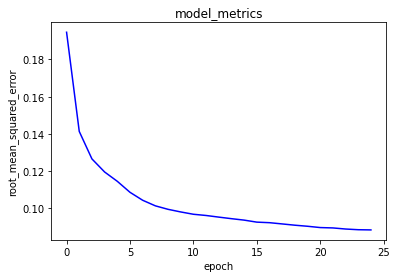

In [28]:
import matplotlib.pyplot as plt

# plot metrics evaluations
plt.plot(history.history['root_mean_squared_error'], color='blue')
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.show()

### Pengujian CNN

In [ ]:
import numpy as np

# taking user samples
user_id = data_cf.user_id.sample(1).iloc[0]
skincare_used_by_users = data_cf[data_cf.user_id == user_id]

# Mendapatkan produk yang belum pernah digunakan oleh pengguna
skincare_not_used_by_users = data[~data['product_id'].isin(skincare_used_by_users.product_id.values)]['product_id']
skincare_not_used_by_users = list(set(skincare_not_used_by_users).intersection(set(skincare_to_skincare_encoded.keys())))
skincare_not_used_by_users = [[skincare_to_skincare_encoded.get(x)] for x in skincare_not_used_by_users]

# Mendapatkan ID pengguna yang diencode
user_encoder = user_to_user_encoded.get(user_id)

# Mendapatkan produk yang pernah digunakan dan dirating oleh pengguna
skincare_used_and_rated_by_user = skincare_used_by_users[skincare_used_by_users['star_rating'] >= 4]['product_id'].values
skincare_used_and_rated_by_user = [[skincare_to_skincare_encoded.get(x)] for x in skincare_used_and_rated_by_user]

# Membuat array untuk prediksi dengan menyatukan produk yang belum pernah digunakan dan produk yang mendapatkan rating tinggi
user_skincare_array = np.hstack(
    ([[user_encoder]] * len(skincare_not_used_by_users + skincare_used_and_rated_by_user),
     skincare_not_used_by_users + skincare_used_and_rated_by_user)
)

# Mendapatkan prediksi dari model
ratings = model.predict(user_skincare_array).flatten()

# Mengurutkan dan mengambil top 10 rekomendasi
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_skincare_ids = [skincare_encoded_to_skincare.get(skincare_not_used_by_users[x][0]) for x in top_ratings_indices]

# Menampilkan rekomendasi
print('Showing recommendations for user: {}'.format(user_id))
print('===' * 9)
print('Top 10 skincare recommendation')
print('----' * 8)

recommended_skincare = data[data['product_id'].isin(recommended_skincare_ids)]
for row in recommended_skincare.itertuples():
    print(row.product_name_concat, ':', row.brand)

8/8 [==============================] - 0s 8ms/step
Showing recommendations for user: 3171
Top 10 skincare recommendation
--------------------------------
Peony Bright Deep Cleansing Foam_Facial Wash : AHC
Peony Bright Clearing Toner_Toner : AHC
Optilash Lash Enhancing Serum_Brow & Lash Treatment : APOTCARE
Infinity Size Acne Patch_Acne Treatment : Acnaway
Acne Body Care Spray_Acne Treatment : Acnemed
Acne Serum_Serum & Essence : Acneno
Luminous Glow Serum_Serum & Essence : Acneno
Beplain Greenful pH-Balanced Cleansing Foam_Facial Wash : Be Plain
The Rescue_Mask Sheet : Beauty Boss
The Lift Job_Mask Sheet : Beauty Boss


## Hybrid Filtering

In [ ]:
# Combine product information from both datasets
product_info = pd.concat([data[['product_id', 'brand', 'product_name_concat', 'description_processed']],
                          data_cf[['product_id', 'brand', 'product_name_concat']]])

In [ ]:
def hybrid_recommendation(user_skincare_history, user_skin_type, incompatible_ingredients):
    # Set the number of recommendations (adjust as needed)
    N = 10

    # Content-Based Filtering
    user_input = f"{user_skin_type} {incompatible_ingredients} {' '.join(user_skincare_history)}"
    tfidf_features = tfidf.transform([user_input])
    content_scores = cosine_similarity(tfidf_features, tfidf_matrix_train).flatten()

    # Collaborative Filtering
    user_id = user_to_user_encoded.get(user_skin_type, None)
    if user_id is not None:
        # Check if the user has skincare history
        if user_id in user_ids:
            cf_input = np.array([[user_id, skincare_to_skincare_encoded[skincare]] for skincare in user_skincare_history])
            cf_score = model.predict(cf_input).flatten()
        else:
            # If no skincare history, find similar users with the same skin type
            similar_users = [uid for uid, stype in user_to_user_encoded.items() if stype == user_id]
            cf_scores = np.array([model.predict(np.array([[su, si] for si in skincare_ids])).flatten() for su in similar_users])
            cf_score = np.mean(cf_scores, axis=0)
    else:
        cf_score = np.zeros_like(content_scores)

    # Hybrid recommendation (weighted sum)
    alpha = 0.7  # Adjust the weight based on performance
    hybrid_scores = alpha * cf_score + (1 - alpha) * content_scores

    # Get top N recommendations
    top_n_indices = np.argsort(hybrid_scores)[::-1][:N]
    top_n_products = [skincare_encoded_to_skincare[i] for i in top_n_indices]

    # Convert indices to product names and brands
    top_n_products_info = product_info.loc[product_info['product_id'].isin(top_n_products),
                                          ['product_name_concat', 'brand']].values.tolist()

    return top_n_products_info

In [ ]:
def print_recommendations(hybrid_recommendations):
    print("=" * 40)
    print("Top N Skincare Recommendation")
    print("=" * 40)
    print("{:<30} | {:<15}".format("Product Name", "Brand"))
    print("-" * 40)

    unique_recommendations = set(tuple(rec) for rec in hybrid_recommendations)

    for product_name, brand in unique_recommendations:
        print("{:<30} | {:<15}".format(product_name, brand))

    print("=" * 40)

In [ ]:
user_skincare_history = ['azarine sunscreen spf 50', 'moisturizer originote']
user_skin_type = 'berminyak'
incompatible_ingredients = 'alcohol fragrance'
hybrid_recommendations = hybrid_recommendation(user_skincare_history, user_skin_type, incompatible_ingredients)

print_recommendations(hybrid_recommendations)

Top N Skincare Recommendation
Product Name                   | Brand          
----------------------------------------
Ace Genius Night Face Cream_Cream | Aceskin        
Ageverlasting Serum_Serum & Essence | AM2PM          
Soap Bar_Facial Wash           | Acne-Aid       
Ace Genius Cleanser_Facial Wash | Aceskin        
Irido Radiant Daily Serum_Serum & Essence | APOTCARE       
Gentle Cleanser_Facial Wash    | Acne-Aid       
Hosanna H2O Intensive Skin Plumping Serum_Serum & Essence | ANTIPODES      
Miracle Sleeping Pack 2_Sleeping Mask | Abelrouge      
AHA BHA PHA Sheet Mask_Mask Sheet | AVOSKIN        
Clay Mask_Bubblegum_Wash-Off   | Barchskin      
